目标函数有关自变量的梯度代表了目标函数在自变量当前位置下降最快的方向。  
在每次迭代中，梯度下降根据自变量当前位置，沿着当前位置的梯度更新自变量。  
->然而如果自变量的迭代方向仅仅取决于自变量当前位置，这可能会带来一些问题。

explame: f(x)=0.1*x1*x1+2*x2*x2

epoch 20,x1: -0.9434666458139824 x2: -7.312316880125978e-05


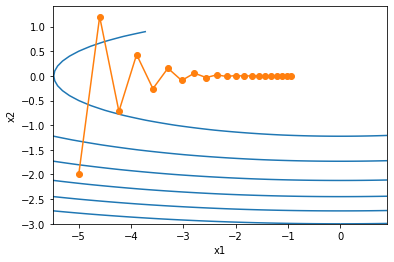

In [12]:
import matplotlib.pyplot as plt
import numpy as np 

eta = 0.4

def gd2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

def f2d(x1, x2):  # 目标函数
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def train2D(trainer):
    x1,x2,s1,s2=-5,-2,0,0
    result=[(x1,x2)]
    for i in range(20):
        x1,x2,s1,s2=trainer(x1,x2,s1,s2)
        result.append((x1,x2))
    print('epoch 20,x1:',x1,'x2:',x2)
    return result

def showTrace2D(f, results):  # 本函数将保存在d2lzh_pytorch包中方便以后使用
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

showTrace2D(f2d, train2D(gd2d))

可以看到，同一位置上，目标函数在竖直方向（x2x轴方向）比在水平方向（x1​轴方向）的斜率的绝对值更大。  
因此，__给定学习率，梯度下降迭代自变量时会使自变量在竖直方向比在水平方向移动幅度更大。__

那么，我们需要一个较小的学习率从而避免自变量在竖直方向上越过目标函数最优解。然而，这会造成自变量在水平方向上朝最优解移动变慢。

下面我们试着将学习率调得稍大一点，此时自变量在竖直方向不断越过最优解并逐渐发散。

epoch 20,x1: -0.38781396819094793 x2: -1673.365108505695


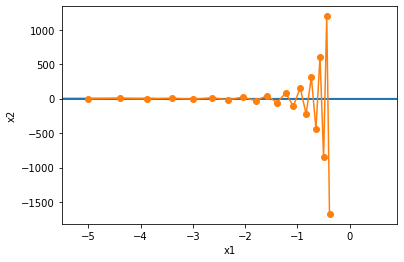

In [13]:
eta = 0.6
showTrace2D(f2d, train2D(gd2d))

# 动量法

时间步t的小批量随机梯度g(t)​的定义。设时间步t的自变量为x(t​)，学习率为η(t)​。 在时间步0，动量法创建速度变量v(0)，并将其元素初始化成0。在时间步t>0，动量法对每次迭代的步骤做如下修改：

* v(t) <- y\*v(t-1)+n(t)*g(t)
* x(t) <- x(t-1) - v(t)

其中，动量超参数γ满足0≤γ<1。当γ=0时，动量法等价于小批量随机梯度下降。

epoch 20,x1: -0.06284345503037861 x2: 0.0012023355717834623


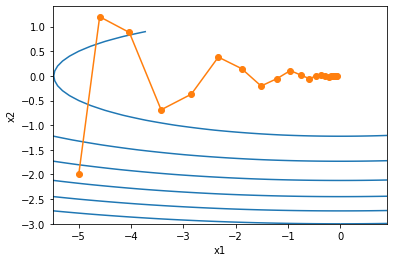

In [18]:
def momentum2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5

showTrace2D(f2d, train2D(momentum2d))

可以看到使用较小的学习率η=0.4和动量超参数γ=0.5时，动量法在竖直方向上的移动更加平滑，且在水平方向上更快逼近最优解。

下面使用较大的学习率η=0.6，此时自变量也不再发散。

epoch 20,x1: 0.007187866737294237 x2: 0.0025532747547120727


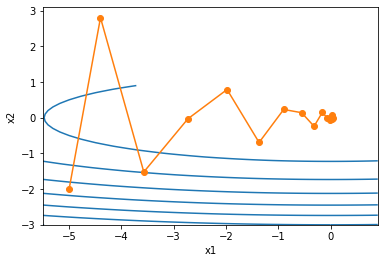

In [15]:
eta=0.6
showTrace2D(f2d, train2D(momentum2d))

# 简洁实现

在PyTorch中，只需要通过参数momentum来指定动量超参数即可使用动量法。

```torch.optim.SGD(params, lr, momentum=0, dampening=0, weight_decay=0, nesterov=False)```